# This script contains:
### 1. Import libraries and data 
### 2. Create subset
### 3. Decomposition
### 4. Test for stationarity
### 5. Check for autocorrelations

## 1. Import libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [3]:
# Configure API key 

quandl.ApiConfig.api_key = 'yourAPIkey'

In [39]:
# For relevancy of this exercise to my global superstore project, I decided to use my global superstore data and pick columns/variables that have a time series component. 

In [7]:
#define path for superstore_project
path = r'C:/users/localadmin/global_superstore_project'

In [9]:
#importing procesed superstore data as gs_store
gs_store = pd.read_csv(os.path.join(path,'Data', 'processed_data', 'superstore_cleaned.csv'))

In [11]:
pd.set_option('display.max_columns', None)
gs_store.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,Order.Priority,Product.ID,Product.Name,Profit,Quantity,Region,Row.ID,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,High,OFF-PA-10002005,Xerox 225,9.3312,3,West,36624,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,Medium,OFF-PA-10002893,"Wirebound Service Call Books, 5 1/2"" x 4""",9.2928,2,West,37033,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,Medium,OFF-PA-10000659,"Adams Phone Message Book, Professional, 400 Me...",9.8418,3,West,31468,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,Medium,OFF-PA-10001144,Xerox 1913,53.2608,2,West,31469,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,High,OFF-PA-10002105,Xerox 223,3.1104,1,West,32440,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [13]:
# listing all columns
gs_store.columns

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', '记录数', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

The columns that will enable me to do a time series analysis are the 'Order.Date' and the 'Sales'. These do not require cleaning so I decide not to execute any data cleaning.

## 2. Create a subset

I use order date to define my time series. This column/variable exists for every sale made by global superstore. This identifies 'order_date' and 'sales' as the major variables/columns necessary for this exercise. My subset shall consist of these two columns.

In [15]:
# defining a subset consisting of 'order_date' and 'sales'
gs_store_subset = gs_store[['Order.Date', 'Sales']]

In [17]:
gs_store_subset.head()

,Order.Date,Sales
0,2011-01-07 00:00:00.000,19
1,2011-01-21 00:00:00.000,19
2,2011-08-05 00:00:00.000,21
3,2011-08-05 00:00:00.000,111
4,2011-09-29 00:00:00.000,6


In [19]:
# Grouping by date
gs_store_subset = gs_store_subset.groupby('Order.Date')['Sales'].sum()

In [21]:
#checking th head for the subset (gs_store_subset)
gs_store_subset.head()

Order.Date
2011-01-01 00:00:00.000     808
2011-01-02 00:00:00.000     314
2011-01-03 00:00:00.000    4502
2011-01-04 00:00:00.000    2809
2011-01-05 00:00:00.000    3664
Name: Sales, dtype: int64

In [23]:
# Comvert 'gs_store_sub' into data frame
gs_store_subset = gs_store_subset.reset_index()
gs_store_subset

,Order.Date,Sales
0,2011-01-01 00:00:00.000,808
1,2011-01-02 00:00:00.000,314
2,2011-01-03 00:00:00.000,4502
3,2011-01-04 00:00:00.000,2809
4,2011-01-05 00:00:00.000,3664
...,...,...
1425,2014-12-27 00:00:00.000,13418
1426,2014-12-28 00:00:00.000,1646
1427,2014-12-29 00:00:00.000,25106
1428,2014-12-30 00:00:00.000,16833


In [25]:
#setting the data as time series
gs_store_subset['datetime'] = pd.to_datetime(gs_store_subset['Order.Date']) # Create a datetime column from "Date.""
gs_store_subset = gs_store_subset.set_index('datetime') # Set the datetime as the index of the dataframe.
gs_store_subset.drop(['Order.Date'], axis=1, inplace=True) # Drop the "Date" column.
gs_store_subset.head()

,Sales
datetime,
2011-01-01,808
2011-01-02,314
2011-01-03,4502
2011-01-04,2809
2011-01-05,3664


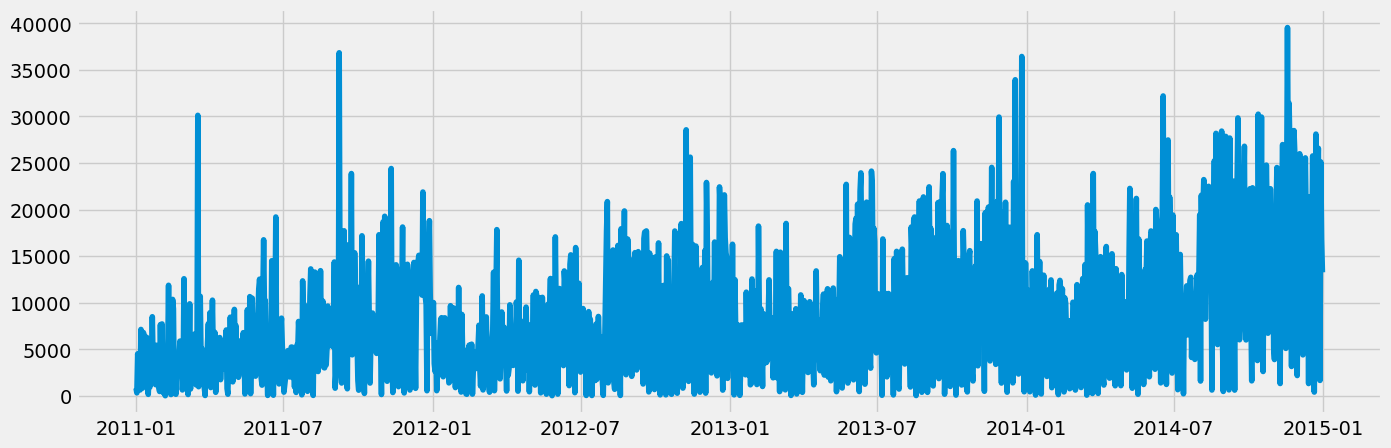

In [27]:
# Plotting the time series to see how the sales moved across time.
plt.figure(figsize=(15,5), dpi=100)
plt.plot(gs_store_subset)

I do not check for duplicates and missing values as prior exercises 6.3, 6.4, and 6.5 repeatedly showed that there were no duplicates and missing values.

## 3. Decomposition

In [29]:
# Create a date range with a start date and number of periods (steps)
date_range = pd.date_range(start='2011-01-01', periods=10, freq='D')

In [31]:
date_range = pd.date_range(start='2011-01-01', end='2015-01-10', freq='D')

In [33]:
# Example time series
data = pd.Series([234, 250, 290, 320, 310, 400, 410, 450, 460, 470, 480, 500,
                  520, 530, 540, 550, 560, 580, 590, 600, 620, 630, 640, 660],
                 index=pd.date_range('2011-01-01', periods=24, freq='M'))

In [35]:
from pylab import rcParams # This will define a fixed size for all charts.
rcParams['figure.figsize'] = 18, 7

In [37]:
# Decomposition
decomposition = sm.tsa.seasonal_decompose(data, model='additive')

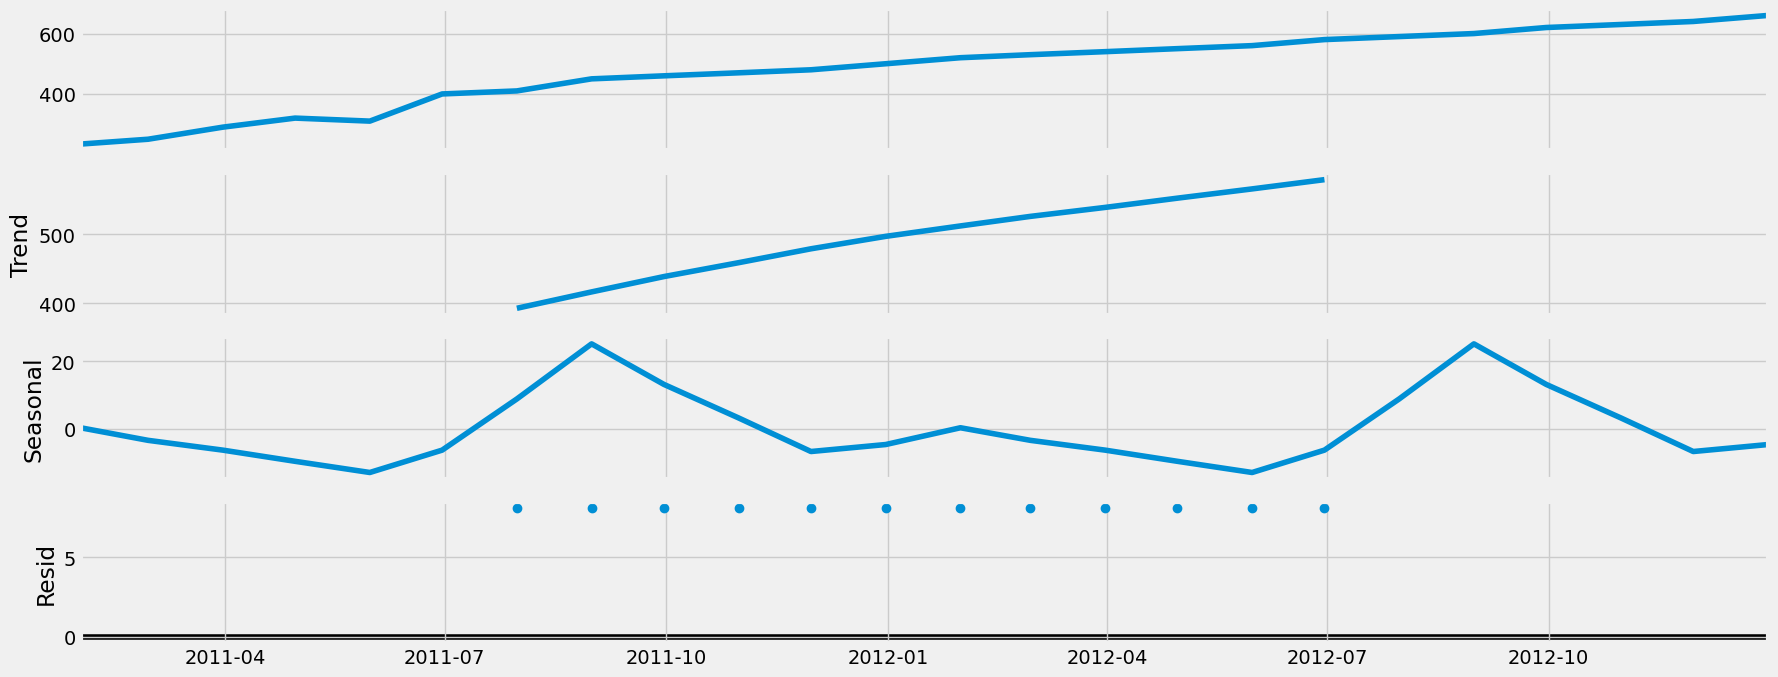

In [39]:
# Plot results
decomposition.plot()
plt.show()

Seasonality is observable though its seemingly weak. This implies that the sales trend tend to repeat itself year in, year out despite the slight variances.

## 4. Testing for stationarity

In [41]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(gs_store_subset['Sales'])

Dickey-Fuller Stationarity test:
Test Statistic                   -3.173396
p-value                           0.021577
Number of Lags Used              21.000000
Number of Observations Used    1408.000000
Critical Value (1%)              -3.435003
Critical Value (5%)              -2.863595
Critical Value (10%)             -2.567864
dtype: float64


The Dickey Fuller test asserts that if the p-value is less than the significance level of 0.05, then the time series is stationary. This is the case with this time series; the p-value of 0.021577 is less than 0.05, hence the tiem series is stationary.

## 5. Testing for autocorrelation

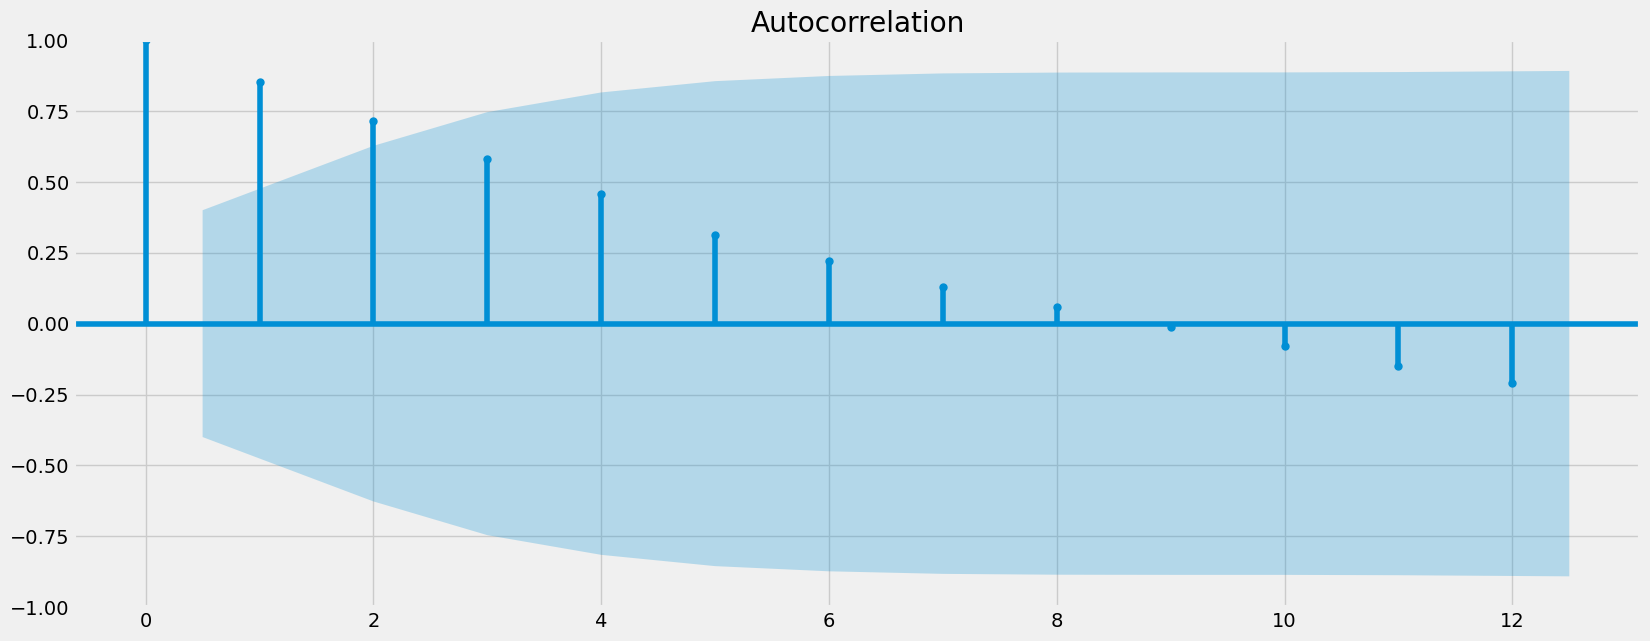

In [44]:
# Using a plot to check for autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots
plot_acf(data)
plt.show()

Four lags exceed the significance level implying that the series is not purely stationary. This warrants the need for differencing.

In [46]:
# Differencing
data_diff = data - data.shift(1)

In [50]:
data_diff.dropna(inplace = True)

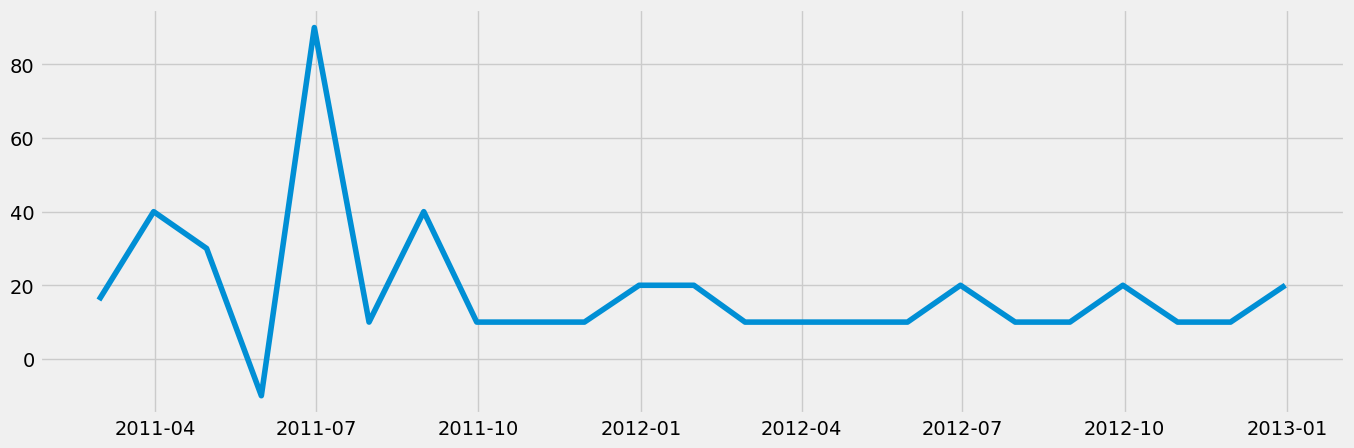

In [52]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [54]:
# Doing dickey-fuller test again after differencing
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.089046
p-value                         0.027375
Number of Lags Used             5.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64


The p-value (0.027375) is less that the significance level (0.05), implying that the series is stationary.

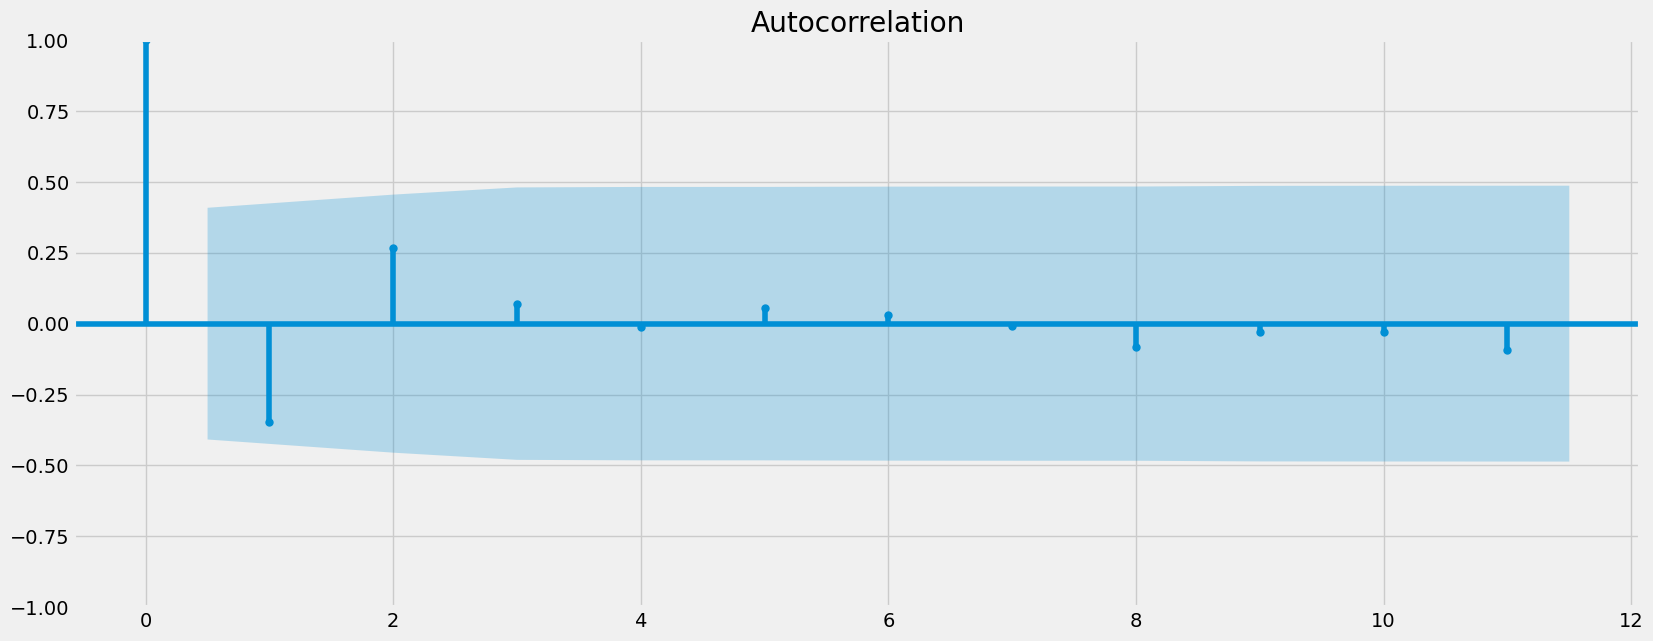

In [56]:
#checking for autocorrelation after differencing
plot_acf(data_diff)
plt.show()

After differencing, only 1 lag exceeds the significance level of 0.05. This shows a better dimension of stationarity.